<a href="https://colab.research.google.com/github/Abdellatif-Elfeke/-TSF-GRIP-Internship-Tasks/blob/main/K_Mean_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/Abdellatif-Elfeke/-TSF-GRIP-Internship-Tasks/main/Iris.csv'
df = pd.read_csv(url)

df.head() 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# dropping Id column

df.drop('Id', axis=1, inplace=True)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.317873214285704, 46.56163015873016, 38.930963049671746, 34.19068792479663, 30.06387443273313, 27.842356060606072, 26.04820224804435]


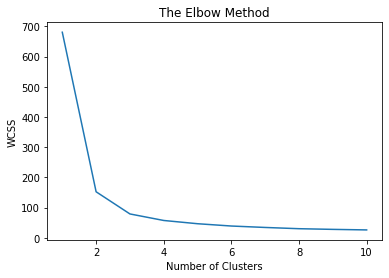

In [9]:
# # Finding the optimum number of clusters for k-means classification

x=df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
list=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    list.append(kmeans.inertia_)
    
print(list)
plt.plot(range(1,11),list)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
#creating the kmeans classifier
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

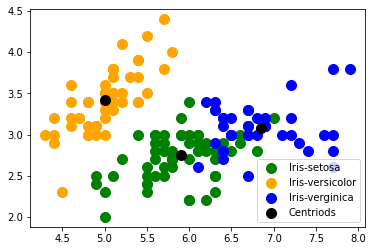

In [11]:
#visualising th clusters
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='green', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='orange', label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='blue', label='Iris-verginica')

#plotting centriods of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centriods')
plt.legend()